# Non-negative Matrix Factorisation

A data set of $731$ low-resolution images of handwritten digit $2$ are provided in the data file $\texttt{nmf.csv}$. The file contains a $731 \times 16^2$ data matrix, where each row is a flattened $16 \times 16$ greyscale image. (Each pixel value is normalised between $0$ and $1$.)

I will: perform non-negative matrix factorisation (NMF) on the data matrix with $q = 30$; reconstruct the first $100$ images from the NMF.

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.decomposition import NMF

# Load the pixel values
pixel_values_ = np.loadtxt('data/nmf.csv', delimiter=',')

# Initialise NMF with q=30 and apply to the pixel values
q = 30
max_iter = 10000
nmf = NMF(n_components=q, max_iter=max_iter, random_state=123)
# I did assess convergence by setting verbose=1. For random_state=123 and
# the default value of tol=1e-4, convergence is reached at iteration 1481.
W = nmf.fit_transform(pixel_values_)
H = nmf.components_

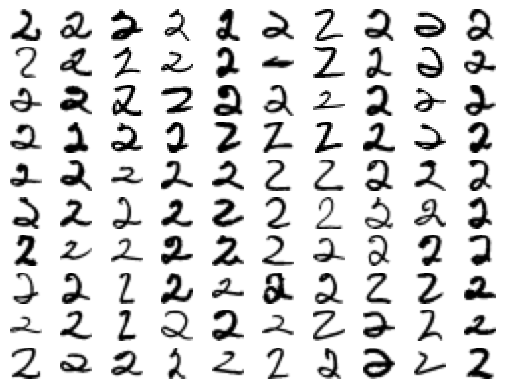

In [2]:
# Plot the first 100 original images
plt.figure()
for i in range(100):
    image = pixel_values_[i].reshape(16, 16)
    plt.subplot(10, 10, (i % 10) * 10 + (i // 10) + 1)
    plt.imshow(image, cmap='gray')
    plt.axis('off')
plt.show()

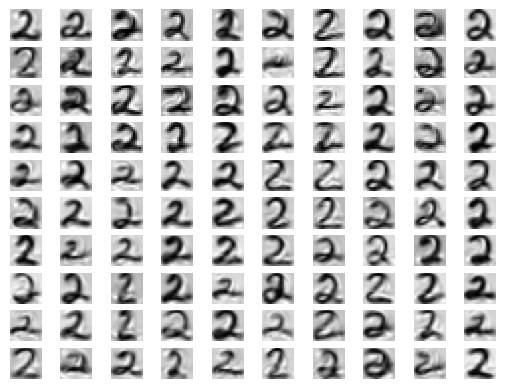

In [3]:
# Reconstruct the images from the NMF
reconstructed_images = W @ H

# Plot the first 100 reconstructed images
plt.figure()
for i in range(100):
    image = reconstructed_images[i].reshape(16, 16)
    plt.subplot(10, 10, (i % 10) * 10 + (i // 10) + 1)
    plt.imshow(image, cmap='gray')
    plt.axis('off')
plt.show()